<a href="https://colab.research.google.com/github/rajdipj/ML/blob/main/Credit_Card_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DS/BankChurners.csv')

In [ ]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


Now as per the instruction on the source of the database, last two columns and 'CLIENTNUM' features are practically not usefull. so we wil drop them.

In [ ]:
# lets see what are the column names
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [ ]:
# Drop the specified columns
columns_to_drop = ['CLIENTNUM', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']
df = df.drop(columns=columns_to_drop)

df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
# Are there any null values?
df.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [ ]:
# number of records
df.count()

Attrition_Flag              10127
Customer_Age                10127
Gender                      10127
Dependent_count             10127
Education_Level             10127
Marital_Status              10127
Income_Category             10127
Card_Category               10127
Months_on_book              10127
Total_Relationship_Count    10127
Months_Inactive_12_mon      10127
Contacts_Count_12_mon       10127
Credit_Limit                10127
Total_Revolving_Bal         10127
Avg_Open_To_Buy             10127
Total_Amt_Chng_Q4_Q1        10127
Total_Trans_Amt             10127
Total_Trans_Ct              10127
Total_Ct_Chng_Q4_Q1         10127
Avg_Utilization_Ratio       10127
dtype: int64

In [ ]:
# number of features
df.shape[1]

20

In [ ]:
# Let's look at the discriptive statistic of this dataset
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


Exploratory Data Analysis(EDA)

In [ ]:
# feature named Attrition_Flag is the target variable. Lest see if there are any anomalies in the records.
df['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [ ]:
# So, there are two categories, Existing Customer are the ones who didn't churned and Attrited Customers are the ones who churned.

# Lets see the churn rate by each category. Will start with gender
df['Gender'].value_counts()


F    5358
M    4769
Name: Gender, dtype: int64

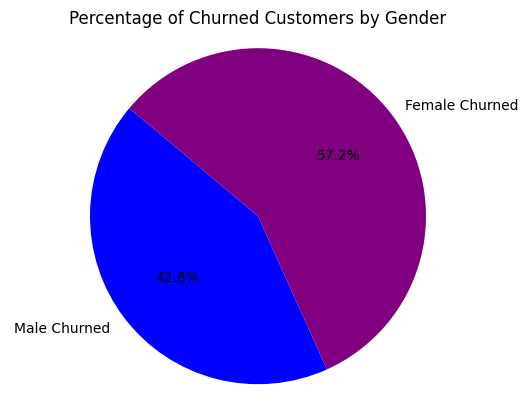

In [ ]:
# Count the occurrences of churned and existing customers by gender
gender_churn_counts = df['Attrition_Flag'].groupby(df['Gender']).value_counts()

# Count the occurrences of churned and existing customers by gender
gender_churn_counts = df['Attrition_Flag'].groupby(df['Gender']).value_counts()

# Extract the counts for churned customers
churned_counts = gender_churn_counts[:, 'Attrited Customer']

# Calculate the percentage of churned customers by gender
total_churned = churned_counts.sum()
male_churn_percentage = (churned_counts['M'] / total_churned) * 100
female_churn_percentage = (churned_counts['F'] / total_churned) * 100

# Create a pie chart
labels = ['Male Churned', 'Female Churned']
sizes = [male_churn_percentage, female_churn_percentage]
colors = ['blue', 'purple']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of Churned Customers by Gender')
plt.show()

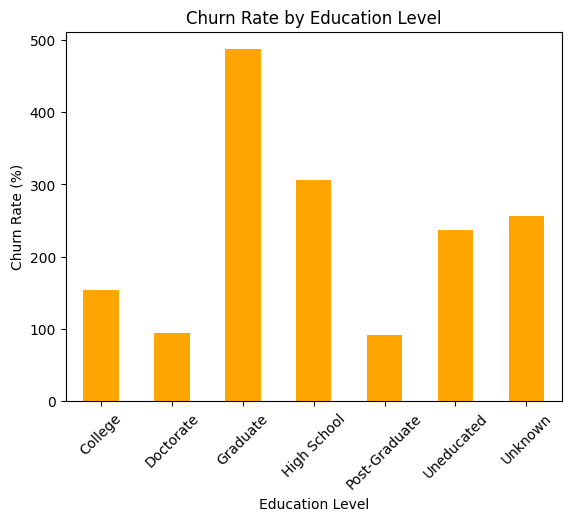

In [ ]:
# Count the occurrences of churned and existing customers by education level
education_churn_counts = df.groupby(['Education_Level', 'Attrition_Flag']).size()


# Extract the counts for churned customers
churned_counts = education_churn_counts[:, 'Attrited Customer']

# Create a bar #plot
churned_counts.plot(kind='bar', color='orange')
plt.xlabel('Education Level')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate by Education Level')
plt.xticks(rotation=45)
plt.show()

From the above bar plot, we can see that Graduates have attrited more followed by high school and uneducated. But we also have to see what % of each education group have attrited to get clear idea. Its more like weighted everage.

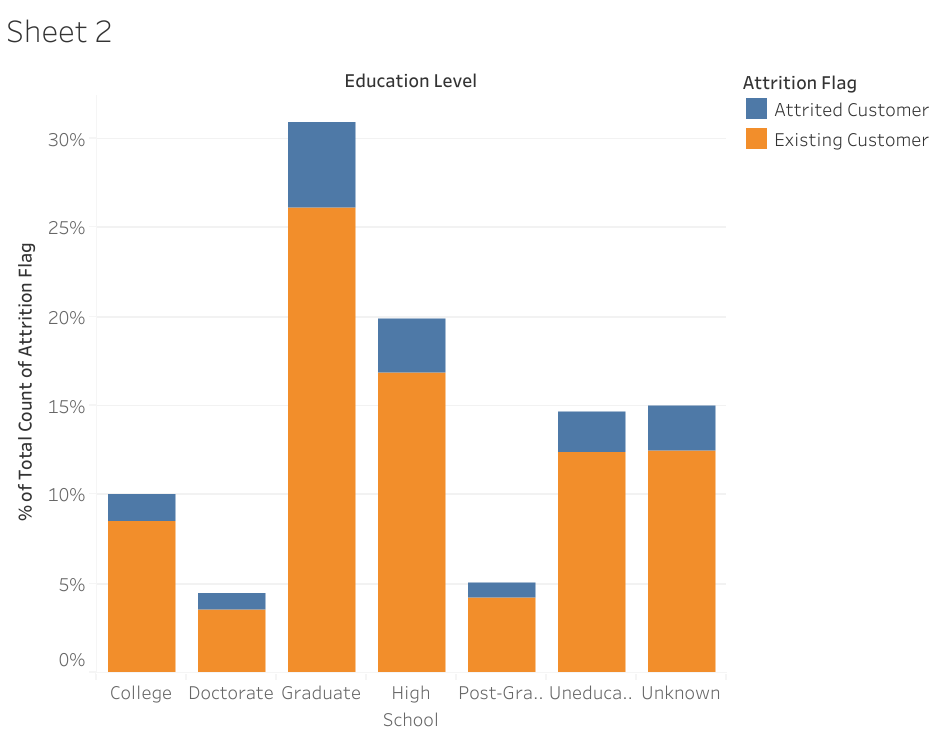

Above bar plot is from Tableau

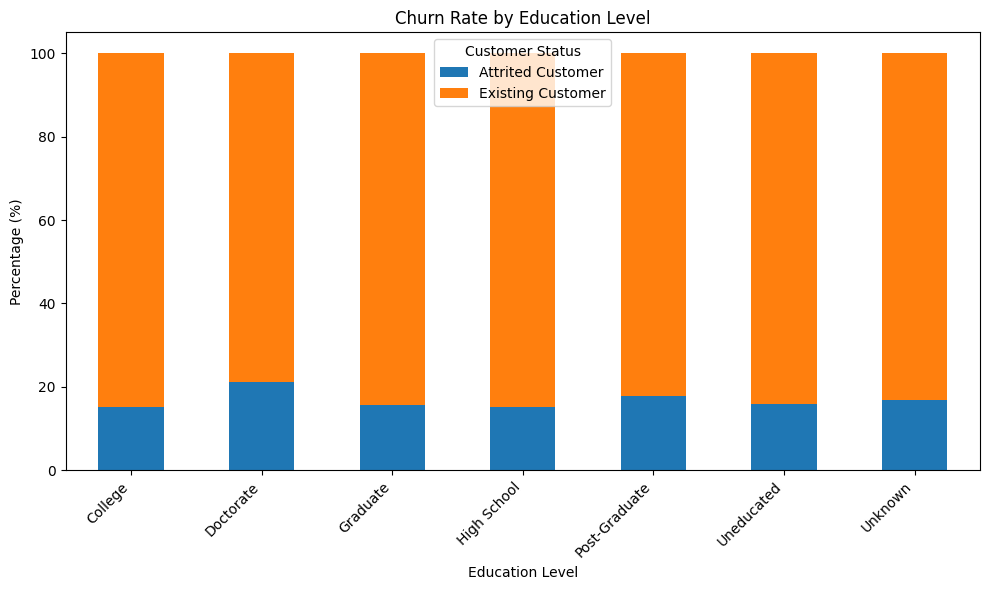

In [ ]:
# Calculate the percentage of churned and existing customers by education level
education_churn_rate = (df.groupby(['Education_Level', 'Attrition_Flag']).size() / df.groupby('Education_Level').size()) * 100

# Unstack the data to separate churned and existing customer percentages
education_churn_rate = education_churn_rate.unstack()

# Create a stacked bar plot
ax = education_churn_rate.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_xlabel('Education Level')
ax.set_ylabel('Percentage (%)')
ax.set_title('Churn Rate by Education Level')
ax.set_xticklabels(education_churn_rate.index, rotation=45, ha='right')

plt.tight_layout()
plt.legend(title='Customer Status')
plt.show()

If we analyze Education group wise, we can see that more % of Dcotorates attrited out of total Doctorates compare to other education groups.

Now lets view it from the dependent count.

In [ ]:
df['Dependent_count'].value_counts()

3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent_count, dtype: int64

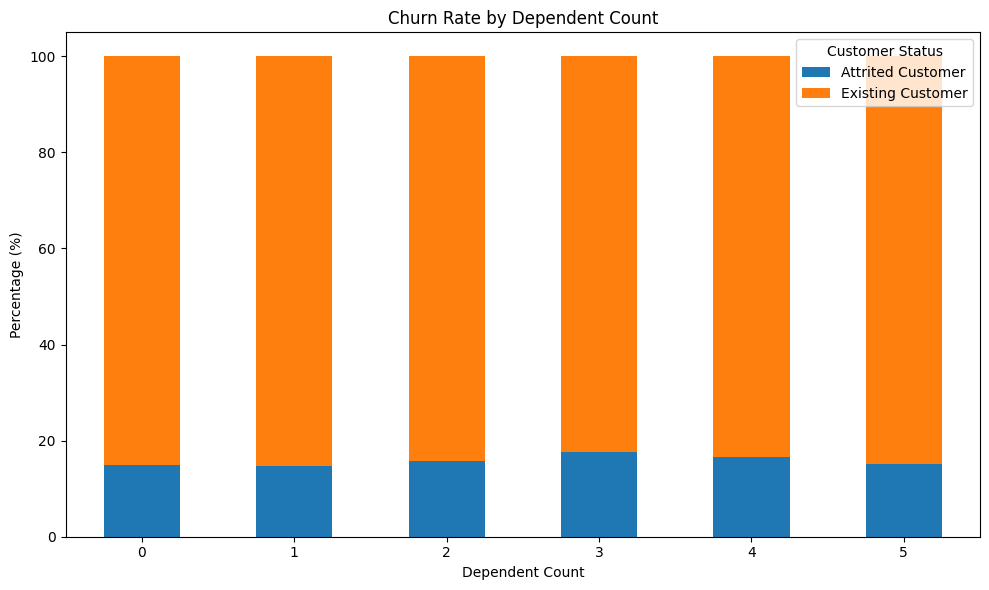

In [ ]:
# Calculate the percentage of churned and existing customers by dependent count
dependent_churn_rate = (df.groupby(['Dependent_count', 'Attrition_Flag']).size() / df.groupby('Dependent_count').size()) * 100

# Unstack the data to separate churned and existing customer percentages
dependent_churn_rate = dependent_churn_rate.unstack()

# Create a stacked bar plot
ax = dependent_churn_rate.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_xlabel('Dependent Count')
ax.set_ylabel('Percentage (%)')
ax.set_title('Churn Rate by Dependent Count')
ax.set_xticklabels(dependent_churn_rate.index, rotation=0, ha='center')

plt.tight_layout()
plt.legend(title='Customer Status')
plt.show()

As can be seen, number of dependents dosnt have much effect on attrition.

Marital_Status  Attrition_Flag   
Divorced        Attrited Customer    16.176471
                Existing Customer    83.823529
Married         Attrited Customer    15.126947
                Existing Customer    84.873053
Single          Attrited Customer    16.941415
                Existing Customer    83.058585
Unknown         Attrited Customer    17.222964
                Existing Customer    82.777036
dtype: float64


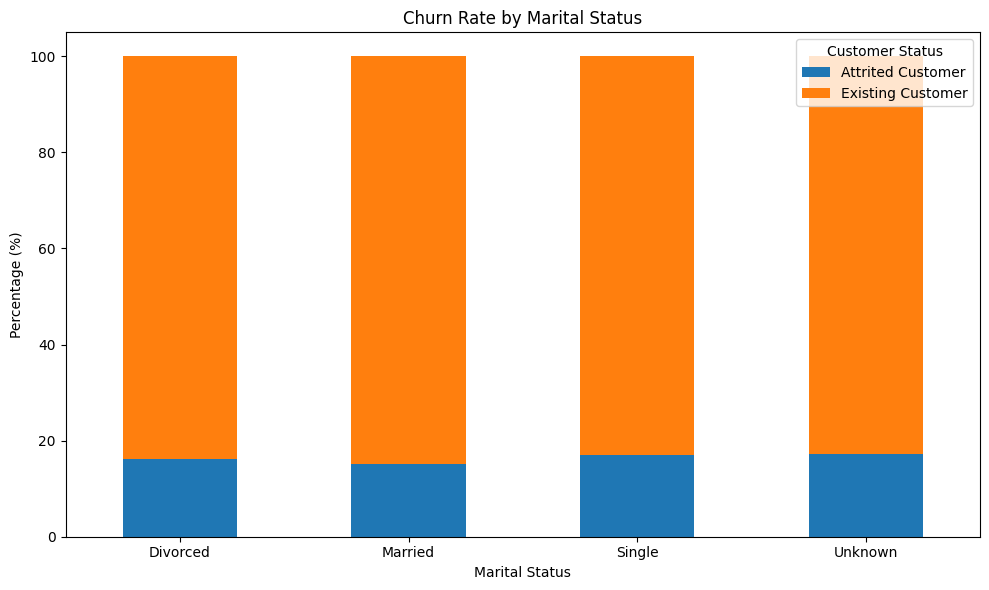

In [ ]:
# Calculate the percentage of churned and existing customers by marital status
marital_churn_rate = (df.groupby(['Marital_Status', 'Attrition_Flag']).size() / df.groupby('Marital_Status').size()) * 100
print(marital_churn_rate)
# Unstack the data to separate churned and existing customer percentages
marital_churn_rate = marital_churn_rate.unstack()

# Create a stacked bar plot
ax = marital_churn_rate.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_xlabel('Marital Status')
ax.set_ylabel('Percentage (%)')
ax.set_title('Churn Rate by Marital Status')
ax.set_xticklabels(marital_churn_rate.index, rotation=0, ha='center')

plt.tight_layout()
plt.legend(title='Customer Status')
plt.show()

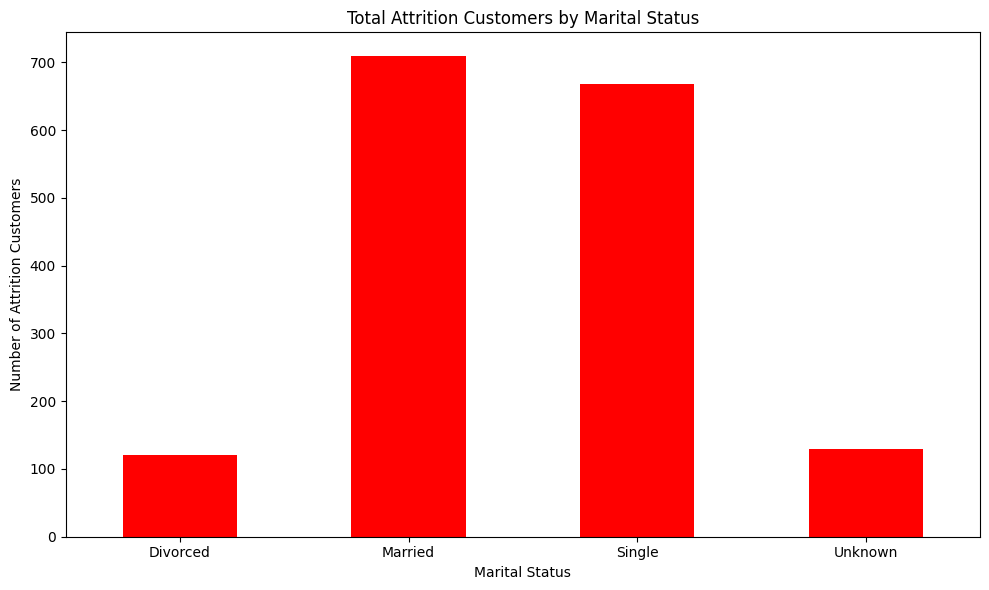

In [ ]:
# Calculate the total number of attrition customers by marital status
attrition_counts = df[df['Attrition_Flag'] == 'Attrited Customer'].groupby('Marital_Status').size()

# Create a bar plot
attrition_counts.plot(kind='bar', color='red', figsize=(10, 6))
plt.xlabel('Marital Status')
plt.ylabel('Number of Attrition Customers')
plt.title('Total Attrition Customers by Marital Status')
plt.xticks(rotation=0, ha='center')

plt.tight_layout()
plt.show()

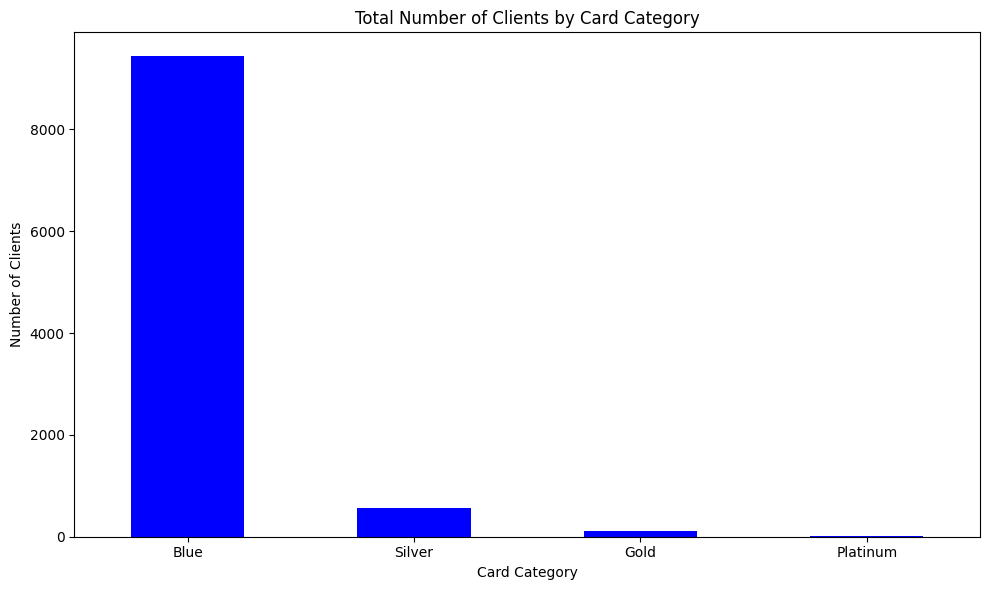

In [ ]:
# Calculate the total number of clients for each card category
card_category_counts = df['Card_Category'].value_counts()

# Create a bar plot for total number of clients by card category
card_category_counts.plot(kind='bar', color='blue', figsize=(10, 6))
plt.xlabel('Card Category')
plt.ylabel('Number of Clients')
plt.title('Total Number of Clients by Card Category')
plt.xticks(rotation=0, ha='center')

plt.tight_layout()
plt.show()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64
Card_Category  Attrition_Flag   
Blue           Attrited Customer    1519
               Existing Customer    7917
Gold           Attrited Customer      21
               Existing Customer      95
Platinum       Attrited Customer       5
               Existing Customer      15
Silver         Attrited Customer      82
               Existing Customer     473
dtype: int64


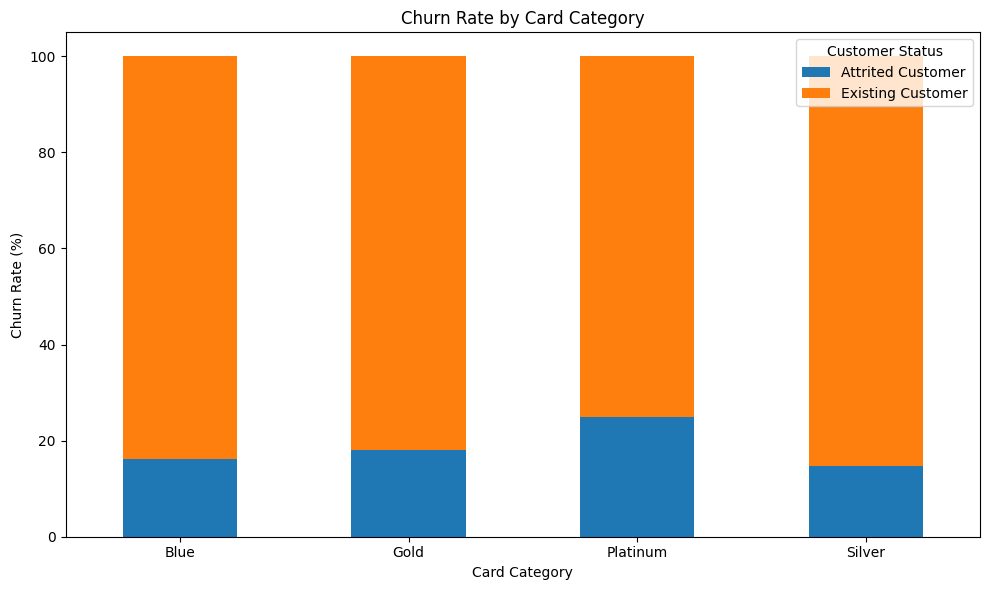

In [ ]:
# Calculate the percentage of churned customers by card category
churn_rate_by_card_category = (df.groupby(['Card_Category', 'Attrition_Flag']).size() / df.groupby('Card_Category').size()) * 100

# Unstack the data to separate churned and existing customer percentages
churn_rate_by_card_category = churn_rate_by_card_category.unstack()
print(df['Card_Category'].value_counts())
print(df.groupby(['Card_Category', 'Attrition_Flag']).size())
# Create a bar plot for churn rate by card category
ax = churn_rate_by_card_category.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_xlabel('Card Category')
ax.set_ylabel('Churn Rate (%)')
ax.set_title('Churn Rate by Card Category')
ax.set_xticklabels(churn_rate_by_card_category.index, rotation=0, ha='center')

plt.tight_layout()
plt.legend(title='Customer Status')
plt.show()

So, most of the bank customer owns a Blue card while churning % is higher in Platinum one.

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64


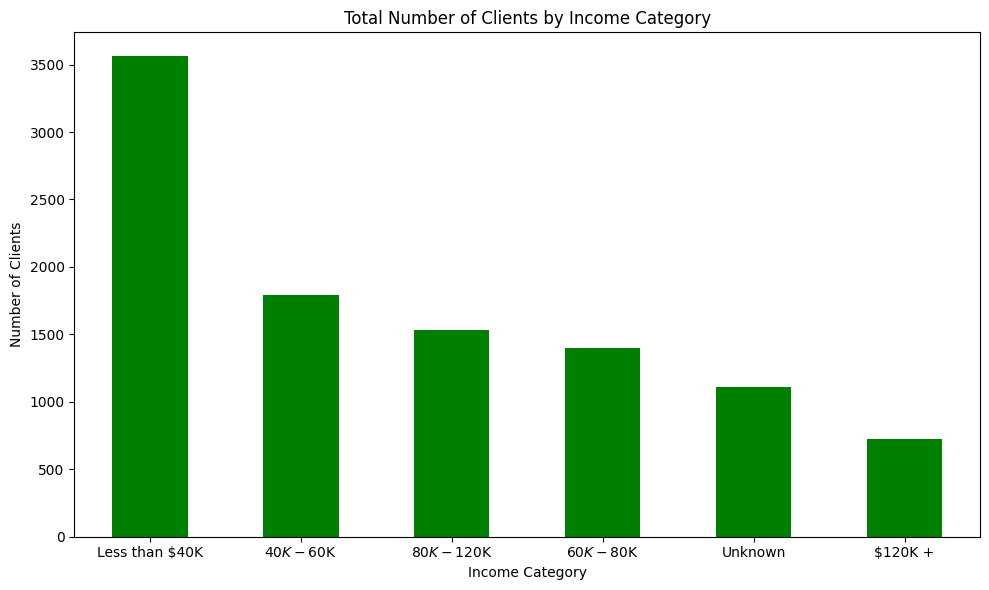

In [ ]:
# Calculate the total number of clients for each income category
income_category_counts = df['Income_Category'].value_counts()
print(income_category_counts)
# Create a bar plot for total number of clients by income category
income_category_counts.plot(kind='bar', color='green', figsize=(10, 6))
plt.xlabel('Income Category')
plt.ylabel('Number of Clients')
plt.title('Total Number of Clients by Income Category')
plt.xticks(rotation=0, ha='center')

plt.tight_layout()
plt.show()

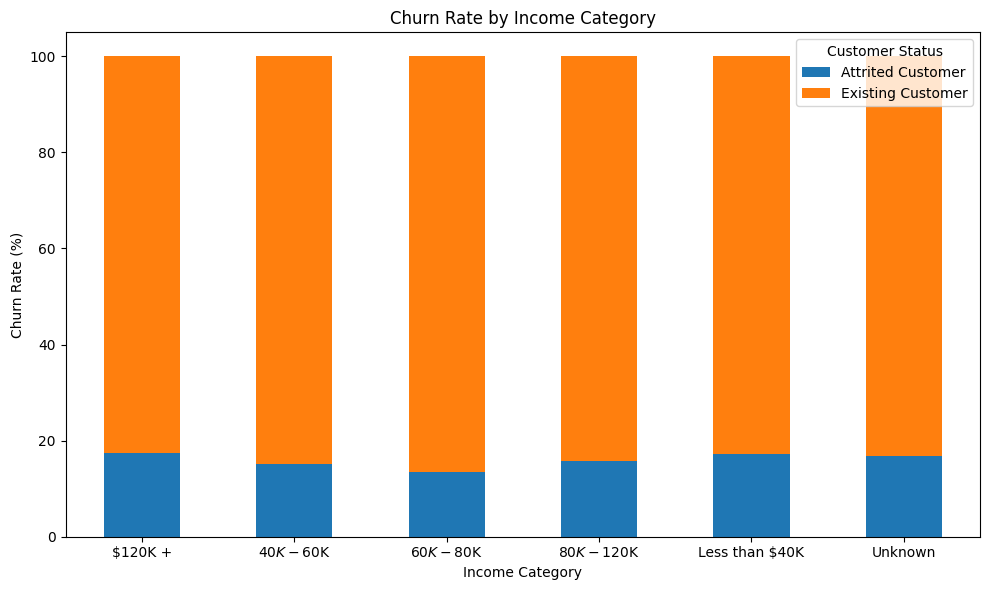

In [ ]:
# Calculate the percentage of churned customers by income category
churn_rate_by_income_category = (df.groupby(['Income_Category', 'Attrition_Flag']).size() / df.groupby('Income_Category').size()) * 100

# Unstack the data to separate churned and existing customer percentages
churn_rate_by_income_category = churn_rate_by_income_category.unstack()

# Create a bar plot for churn rate by income category
ax = churn_rate_by_income_category.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_xlabel('Income Category')
ax.set_ylabel('Churn Rate (%)')
ax.set_title('Churn Rate by Income Category')
ax.set_xticklabels(churn_rate_by_income_category.index, rotation=0, ha='center')

plt.tight_layout()
plt.legend(title='Customer Status')
plt.show()

Again, throughout the income wise, attrition reamins almost same. Now lets look at the co relation between each variables via heatmap.

In [ ]:
df.shape[1]


20

In [ ]:
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

<timed exec>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


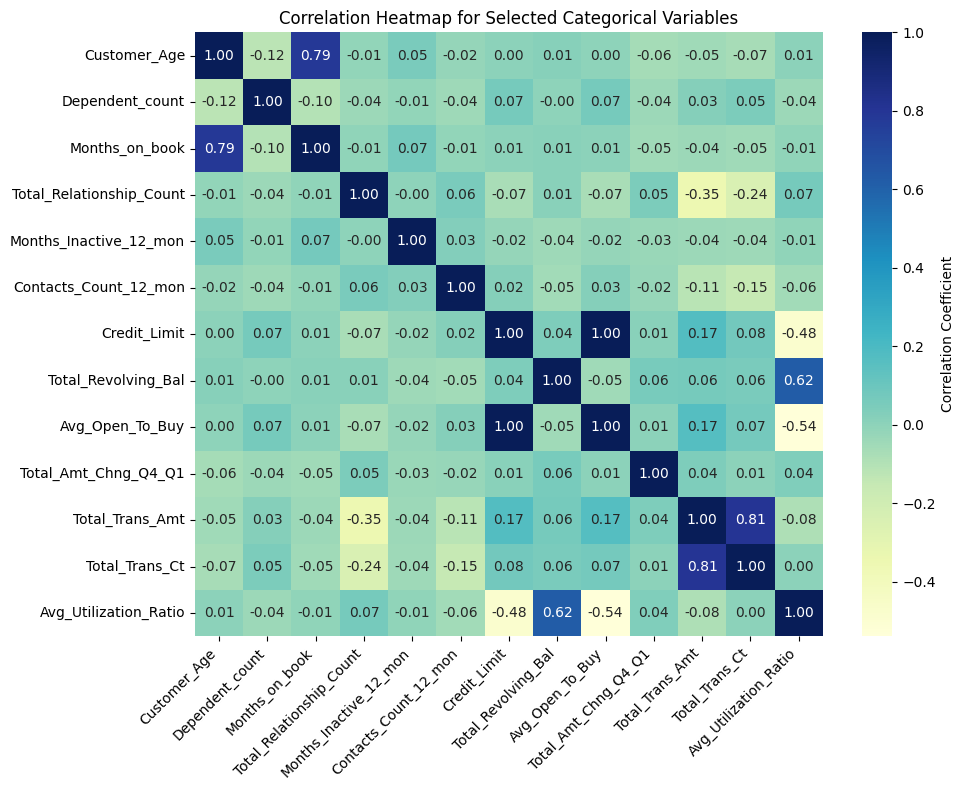

CPU times: user 829 ms, sys: 209 ms, total: 1.04 s
Wall time: 847 ms


In [ ]:
%%time
# List of selected categorical variables
selected_vars = ['Attrition_Flag', 'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
                 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
                 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Avg_Utilization_Ratio']

# Create a DataFrame with the selected categorical variables
selected_df = df[selected_vars]

# Calculate the correlation matrix
corr_matrix = selected_df.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='YlGnBu', annot=True, fmt=".2f", cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Heatmap for Selected Categorical Variables')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


I think we have explored the data enough. Now lets begin pre processing the data.

In [ ]:
# let's once again have a look at the data
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Define the categorical variables to encode
categorical_vars = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

# Initialize LabelEncoder and OneHotEncoder
label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder(drop='first', sparse=False)  # Use drop='first' to avoid multicollinearity

# Encode binary categorical variable 'Attrition_Flag'
df['Attrition_Flag'] = label_encoder.fit_transform(df['Attrition_Flag'])

# Encode other categorical variables using OneHotEncoder
encoded_cols = onehot_encoder.fit_transform(df[categorical_vars])

# Create a DataFrame for the encoded columns
encoded_df = pd.DataFrame(encoded_cols, columns=onehot_encoder.get_feature_names_out(categorical_vars))

# Concatenate the encoded columns with the original DataFrame
df_encoded = pd.concat([df, encoded_df], axis=1)

# Drop the original categorical columns
df_encoded.drop(categorical_vars, axis=1, inplace=True)

# Display the first few rows of the encoded DataFrame
df_encoded.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,1,45,3,39,5,1,3,12691.0,777,11914.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,49,5,44,6,1,2,8256.0,864,7392.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1,51,3,36,4,1,0,3418.0,0,3418.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1,40,4,34,3,4,1,3313.0,2517,796.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1,40,3,21,5,1,0,4716.0,0,4716.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.preprocessing import StandardScaler

# Extract the numerical columns that need to be scaled
numerical_cols = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
                  'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
                  'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Avg_Utilization_Ratio']

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the numerical features
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# Display the first few rows of the scaled DataFrame
df_encoded.head()

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,1,-0.165406,0.503368,0.384621,0.763943,-1.327136,0.492404,0.446622,-0.473422,0.488971,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.333570,2.043199,1.010715,1.407306,-1.327136,-0.411616,-0.041367,-0.366667,-0.008486,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1,0.583058,0.503368,0.008965,0.120579,-1.327136,-2.219655,-0.573698,-1.426858,-0.445658,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1,-0.789126,1.273283,-0.241473,-0.522785,1.641478,-1.315636,-0.585251,1.661686,-0.734100,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1,-0.789126,0.503368,-1.869317,0.763943,-1.327136,-2.219655,-0.430877,-1.426858,-0.302868,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_encoded.shape[1]

33

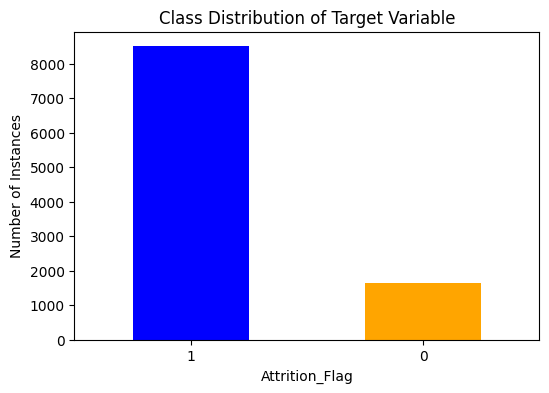

1    8500
0    1627
Name: Attrition_Flag, dtype: int64


In [ ]:
# Replace 'Attrition_Flag' with your actual target variable
target_variable = 'Attrition_Flag'

# Calculate the class distribution
class_distribution = df_encoded[target_variable].value_counts()

# Create a bar plot to visualize class distribution
plt.figure(figsize=(6, 4))
class_distribution.plot(kind='bar', color=['blue', 'orange'])
plt.title('Class Distribution of Target Variable')
plt.xlabel(target_variable)
plt.ylabel('Number of Instances')
plt.xticks(rotation=0)
plt.show()

# Print the class distribution counts
print(class_distribution)

the data is highly imbalance as the Existing customer are far more than Attrited customer. So, I would go with class balancing.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# Assuming df_encoded is your preprocessed and encoded DataFrame
X = df_encoded.drop('Attrition_Flag', axis=1)
y = df_encoded['Attrition_Flag']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Apply SMOTE for oversampling
smote = SMOTE(random_state=1)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train a RandomForestClassifier
clf = RandomForestClassifier(random_state=1)
clf.fit(X_resampled, y_resampled)

# Evaluate the model
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       331
           1       0.98      0.98      0.98      1695

    accuracy                           0.96      2026
   macro avg       0.93      0.93      0.93      2026
weighted avg       0.96      0.96      0.96      2026



In [ ]:
X.shape[1]

32

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Scale the feature data (X_resampled)
X_resampled_scaled = scaler.fit_transform(X_resampled)

# Initialize SelectKBest with chi-squared test
selector = SelectKBest(score_func=chi2)

# Fit and transform on the scaled feature data
X_train_selected = selector.fit_transform(X_resampled_scaled, y_resampled)

# Get the selected feature indices
selected_indices = selector.get_support(indices=True)

# Get the corresponding feature names
selected_features = X.columns[selected_indices]

# Print the selected feature names
print("Selected Features:", selected_features)


Selected Features: Index(['Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Gender_M', 'Income_Category_$60K - $80K'],
      dtype='object')


These features are deemed to be the most relevant according to the chi2 test and can potentially improve the performance of model while reducing the dimensionality of the data.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Assuming df_encoded is your preprocessed and encoded DataFrame
X = df_encoded[selected_features]
y = df_encoded['Attrition_Flag']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Apply SMOTE for oversampling
smote = SMOTE(random_state=1)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train a RandomForestClassifier
clf = RandomForestClassifier(random_state=1)
clf.fit(X_resampled, y_resampled)

# Evaluate the model
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.89      0.87       331
           1       0.98      0.97      0.97      1695

    accuracy                           0.96      2026
   macro avg       0.91      0.93      0.92      2026
weighted avg       0.96      0.96      0.96      2026



In [ ]:
X.shape[1]

10

as we can see, reducing dimentions didnt had any effects on the model performance.

Now lets try different models. we'll start with Gradient boosting algorithm.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import xgboost as xgb

# Load your preprocessed and encoded DataFrame
# Assuming df_encoded is your preprocessed and encoded DataFrame
X = df_encoded[selected_features]
y = df_encoded['Attrition_Flag']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Initialize and train the XGBoost model
model = xgb.XGBClassifier(random_state=1)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.84      0.86       331
           1       0.97      0.98      0.97      1695

    accuracy                           0.96      2026
   macro avg       0.93      0.91      0.92      2026
weighted avg       0.96      0.96      0.96      2026



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

# Load your preprocessed and encoded DataFrame
# Assuming df_encoded is your preprocessed and encoded DataFrame
X = df_encoded[selected_features]
y = df_encoded['Attrition_Flag']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize a sequential model
model = Sequential()

# Add input and hidden layers
model.add(Dense(units=64, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))

# Add output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=1)

# Evaluate the model
y_pred = model.predict(X_test_scaled)
y_pred = (y_pred > 0.5).astype(int)
print(classification_report(y_test, y_pred))


Epoch 1/10
254/254 [==============================] - 2s 3ms/step - loss: 0.3007 - accuracy: 0.8836
Epoch 2/10
254/254 [==============================] - 1s 3ms/step - loss: 0.2029 - accuracy: 0.9199
Epoch 3/10
254/254 [==============================] - 0s 2ms/step - loss: 0.1807 - accuracy: 0.9296
Epoch 4/10
254/254 [==============================] - 0s 2ms/step - loss: 0.1700 - accuracy: 0.9341
Epoch 5/10
254/254 [==============================] - 0s 2ms/step - loss: 0.1632 - accuracy: 0.9348
Epoch 6/10
254/254 [==============================] - 0s 2ms/step - loss: 0.1572 - accuracy: 0.9405
Epoch 7/10
254/254 [==============================] - 0s 2ms/step - loss: 0.1535 - accuracy: 0.9390
Epoch 8/10
254/254 [==============================] - 0s 2ms/step - loss: 0.1492 - accuracy: 0.9432
Epoch 9/10
 90/254 [=========>....................] - ETA: 0s - loss: 0.1474 - accuracy: 0.9455

In [ ]:
%%time
from sklearn.metrics import classification_report
import xgboost as xgb
from keras.models import Sequential
from keras.layers import Dense

# Initialize dictionaries to store results
model_results = {}

# Model 1: Random Forest
X = df_encoded.drop('Attrition_Flag', axis=1)
y = df_encoded['Attrition_Flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

smote = SMOTE(random_state=1)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train a RandomForestClassifier
clf = RandomForestClassifier(random_state=1)
clf.fit(X_resampled, y_resampled)

y_pred_rf = clf.predict(X_test)

# Store results in dictionary
model_results['Random Forest'] = classification_report(y_test, y_pred_rf)

# Model 2: XGBoost
X = df_encoded[selected_features]
y = df_encoded['Attrition_Flag']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Initialize and train the XGBoost model
model = xgb.XGBClassifier(random_state=1)
model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = model.predict(X_test)

# Store results in dictionary
model_results['XGBoost'] = classification_report(y_test, y_pred_xgb)

# Model 3: Neural Network
X = df_encoded[selected_features]
y = df_encoded['Attrition_Flag']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize a sequential model
model = Sequential()

# Add input and hidden layers
model.add(Dense(units=64, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))

# Add output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=1)

# Evaluate the model
y_pred = model.predict(X_test_scaled)
y_pred_nn = (y_pred > 0.5).astype(int)

# Store results in dictionary
model_results['Neural Network'] = classification_report(y_test, y_pred_nn)

# Print or visualize the comparison
for model_name, metrics in model_results.items():
    print(f"Model: {model_name}\n{metrics}\n{'='*40}")


From the results, it appears that both the Random Forest and XGBoost models are performing quite well, with high precision, recall, and F1-scores for both classes. The Neural Network model also shows competitive results, although its precision and recall for class 0 are slightly lower compared to the other models.